<a href="https://colab.research.google.com/github/aneeq-shaffy/SE4050-Deep-Learning/blob/main/Baseline_TFIDF_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Default title text
!pip install pandas


In [ ]:
import pandas as pd
import zipfile
import io

# URL from the UCI Machine Learning Repository (official hosting)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download the ZIP file content
import requests
response = requests.get(url)
zip_content = io.BytesIO(response.content)

# Extract the specific file from the ZIP archive
with zipfile.ZipFile(zip_content, 'r') as z:
    # Assuming the data file is named 'SMSSpamCollection'
    with z.open('SMSSpamCollection') as f:
        # Read the dataset into a pandas DataFrame
        df = pd.read_csv(f, sep='\t', names=['label', 'message'], header=None)

# Display the first few records to verify
display(df.head())

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Number of rows and columns
print("Dataset shape:", df.shape)

# Check class distribution
print("\nLabel counts:")
print(df['label'].value_counts())


Dataset shape: (5572, 2)

Label counts:
label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# -----------------------------------------
# Step 1: Import Required Libraries
# -----------------------------------------

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Download NLTK stopwords (first time only)
nltk.download('stopwords')
from nltk.corpus import stopwords

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# -----------------------------------------
# Step 2: Text Cleaning and Preprocessing
# -----------------------------------------

import nltk
nltk.download('stopwords', quiet=True) # Ensure stopwords are downloaded
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers and punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Apply cleaning
df['clean_message'] = df['message'].apply(clean_text)

# Display sample
df.head()

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [ ]:
# -----------------------------------------
# Step 3: Label Encoding
# -----------------------------------------
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message,clean_message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


In [ ]:
# -----------------------------------------
# Step 4: Split Dataset
# -----------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'], df['label_num'], test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 4457
Testing samples: 1115


In [ ]:
# -----------------------------------------
# Step 5: TF-IDF Vectorization
# -----------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("✅ TF-IDF vectorization complete")
print("TF-IDF Matrix Shape:", X_train_tfidf.shape)

✅ TF-IDF vectorization complete
TF-IDF Matrix Shape: (4457, 3000)


In [ ]:
# -----------------------------------------
# Step 6: Train Logistic Regression Model
# -----------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Logistic Regression F1-score: {f1_lr:.4f}")

Logistic Regression Accuracy: 0.9668
Logistic Regression F1-score: 0.8593


In [ ]:
# -----------------------------------------
# Step 7: Train SVM Model (Optional)
# -----------------------------------------
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"SVM F1-score: {f1_svm:.4f}")

SVM Accuracy: 0.9892
SVM F1-score: 0.9583


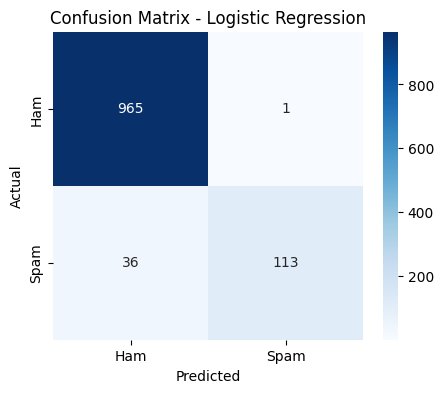

Classification Report - Logistic Regression
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
# -----------------------------------------
# Step 8: Model Evaluation and Confusion Matrix
# -----------------------------------------
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=['Ham', 'Spam']))